In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

In [87]:
DATA_PATH = '../data/data'

# Articles

In [88]:
# load articles csv
ARTICLES_INTEREST_COLUMNS = ['article_id', 'first_pick', 'second_pick', 'fourth_pick', 'fifth_more_pick']
articles_picking_time = pd.read_csv(os.path.join(DATA_PATH, 'hackathon_article_picking_time.csv'), delimiter=';') 
#articles_picking_time = articles_picking_time[ARTICLES_INTEREST_COLUMNS]
articles_picking_time.head()

,article_id,article_name,first_pick,second_pick,third_pick,fourth_pick,fifth_more_pick
0,a0010016,LEJIA BONAREA 2 L,13,12,10,8,8
1,a0020018,REFRESCO LIMON FANTA BOTELLA 2 L,15,14,14,14,12
2,a0020088,COMPRESA FINA Y SEGURA EVAX NORMAL 16 UND,13,11,11,11,11
3,a0020235,REFRESCO NARANJA FANTA BOTELLA 2 L.,8,6,4,3,2
4,a0020647,BAYETA VILEDA SUAVE 1 + 1,15,14,13,12,12


In [107]:
articles_picking_time.describe()

,first_pick,second_pick,third_pick,fourth_pick,fifth_more_pick
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,11.320000,10.292308,9.301538,8.366154,7.390769
std,3.524482,3.568220,3.691185,3.696607,3.752930
min,5.000000,3.000000,2.000000,1.000000,1.000000
25%,8.000000,7.000000,6.000000,6.000000,4.000000
50%,12.000000,10.000000,9.000000,8.000000,7.000000
75%,14.000000,13.000000,12.000000,11.000000,10.000000
max,18.000000,18.000000,17.000000,17.000000,16.000000


# Costumers

In [110]:
# load articles csv
customers_df = pd.read_csv(os.path.join(DATA_PATH, 'hackathon_customers_properties.csv'), delimiter=';') 
customers_df.head()

,customer_id,step_seconds,picking_offset
0,c0,2,2
1,c1,2,1
2,c2,3,4
3,c3,1,3
4,c4,6,2


In [111]:
customers_df.describe()

,step_seconds,picking_offset
count,100.000000,100.000000
mean,4.180000,2.410000
std,1.924746,1.712078
min,1.000000,0.000000
25%,2.000000,1.000000
50%,4.000000,2.000000
75%,6.000000,4.000000
max,7.000000,5.000000


# Articles agrupations

IDEA: El artículo en general no nos importa, realmente nos interesa el tiempo de picking. Por lo tanto para reducir la complejidad del problema, se va intentar realizar una agrupación de los articulos con tiempos de agrupación similares.

In [112]:
# extract picking time 
picking_times = articles_picking_time[['first_pick', 'second_pick', 'fourth_pick', 'fifth_more_pick']]
picking_times.head()

,first_pick,second_pick,fourth_pick,fifth_more_pick
0,13,12,8,8
1,15,14,14,12
2,13,11,11,11
3,8,6,3,2
4,15,14,12,12


In [114]:
Ks = range(1, 50)
km = [KMeans(n_clusters=i, random_state=43, n_init=10) for i in Ks]
score = [km[i].fit(picking_times).inertia_ for i in range(len(km))]

Número óptimo de clústeres (codo): 2


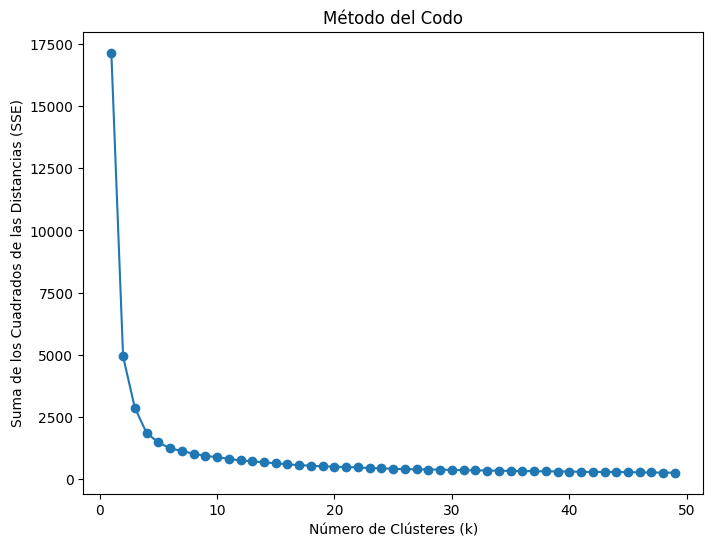

In [115]:
elbow_point = np.argmin(np.diff(score)) + 2
plt.figure(figsize=(8, 6))
plt.plot(Ks, score, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Suma de los Cuadrados de las Distancias (SSE)')
print(f"Número óptimo de clústeres (codo): {elbow_point}")
plt.show()

Group the articles

In [117]:
# retrain Kmeans
km = KMeans(n_clusters=5, random_state=42, n_init=10).fit(picking_times)
# grouping
groups = km.predict(picking_times)
groups

array([2, 0, 3, 4, 3, 1, 1, 4, 2, 2, 3, 0, 1, 3, 2, 0, 4, 0, 3, 4, 0, 3,
       4, 4, 3, 2, 1, 4, 0, 3, 2, 2, 0, 0, 0, 4, 0, 4, 4, 1, 0, 1, 4, 2,
       1, 4, 2, 1, 2, 1, 1, 3, 3, 3, 0, 4, 0, 4, 0, 2, 4, 0, 3, 4, 4, 2,
       3, 3, 3, 2, 1, 4, 4, 4, 2, 4, 0, 3, 1, 3, 4, 2, 2, 2, 3, 0, 2, 0,
       1, 4, 3, 3, 1, 1, 3, 3, 3, 2, 1, 0, 0, 1, 2, 0, 1, 1, 3, 0, 2, 1,
       3, 1, 3, 3, 3, 3, 0, 1, 2, 3, 1, 0, 1, 1, 0, 4, 4, 3, 3, 0, 4, 4,
       2, 1, 4, 1, 2, 2, 3, 0, 4, 1, 4, 1, 4, 1, 2, 1, 1, 0, 2, 0, 4, 1,
       3, 4, 1, 2, 1, 0, 3, 3, 1, 4, 1, 4, 4, 3, 0, 3, 3, 2, 2, 1, 4, 3,
       1, 2, 1, 3, 2, 3, 3, 0, 1, 3, 1, 1, 3, 4, 3, 3, 2, 2, 1, 3, 4, 1,
       1, 1, 1, 4, 2, 4, 4, 0, 0, 0, 3, 3, 1, 1, 2, 1, 4, 3, 1, 0, 3, 1,
       1, 2, 4, 1, 3, 2, 0, 3, 2, 2, 4, 4, 2, 2, 4, 3, 2, 0, 2, 3, 2, 2,
       4, 4, 3, 0, 3, 3, 0, 4, 1, 1, 4, 1, 3, 1, 3, 4, 0, 4, 0, 0, 1, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 0, 4, 3, 1, 3, 4, 1, 3, 4, 4, 4, 0, 3, 4,
       2, 0, 0, 3, 1, 1, 2, 3, 3, 1, 2, 2, 3, 4, 1,

In [118]:
# include groups to the articles picking time set
articles_picking_time_groups =  articles_picking_time.copy()
articles_picking_time_groups['group'] = groups

In [120]:
for group_id, group_df in articles_picking_time_groups.groupby('group'):
    display(group_df)
    display(group_df.describe())

,article_id,article_name,first_pick,second_pick,third_pick,fourth_pick,fifth_more_pick,group
1,a0020018,REFRESCO LIMON FANTA BOTELLA 2 L,15,14,14,14,12,0
11,a0086760,REFRESCO ISOTONICO AQUARIUS NARANJA BOTELLA 1....,17,17,16,14,13,0
15,a0087147,REFRESCO NORMAL COCA COLA BOTELLA 2L,16,16,16,16,14,0
17,a0088024,LIMPIAPARABRISAS BONAREA 2.5 L.,17,17,15,13,12,0
20,a0091272,PAÑAL T/2 DODOT SENSITIVE 4-8 KG 34 UNT,16,15,13,13,11,0
28,a0225,GUISANTE BONAREA PLS,16,16,15,14,13,0
32,a0242,TRUFAS DE CHOCOLATE BONAREA PLS,17,15,15,14,14,0
33,a0244,PALITOS DE SURIMI BONAREA PLS,17,17,16,14,14,0
34,a0245,CALAMAR ENTERO BONAREA PLS,17,16,14,13,13,0
36,a0320,BOMBON ALMENDRADO BONAREA PLS,16,16,16,14,14,0


,first_pick,second_pick,third_pick,fourth_pick,fifth_more_pick,group
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.0
mean,16.510204,15.816327,15.020408,14.061224,13.081633,0.0
std,1.063063,1.073807,1.233048,1.179833,1.238896,0.0
min,14.000000,14.000000,13.000000,12.000000,11.000000,0.0
25%,16.000000,15.000000,14.000000,13.000000,12.000000,0.0
50%,17.000000,16.000000,15.000000,14.000000,13.000000,0.0
75%,17.000000,17.000000,16.000000,15.000000,14.000000,0.0
max,18.000000,18.000000,17.000000,17.000000,16.000000,0.0


,article_id,article_name,first_pick,second_pick,third_pick,fourth_pick,fifth_more_pick,group
5,a0020829,VERMOUTH BIANCO MARTINI 1 L,9,7,6,6,6,1
6,a0020830,VERMOUTH ROSSO MARTINI 1 L,10,8,7,6,4,1
12,a0086903,REFRESCO TE CON AZUCAR SAN BENEDETTO LIMON 1.5 L.,10,8,6,5,3,1
26,a0218,POTA ANILLAS S/REBOZAR BONAREA PLS,9,8,8,6,4,1
39,a0370,HELADO DE BOMBON CRUJIENT BONAREA PLS,9,8,6,4,4,1
...,...,...,...,...,...,...,...,...
310,a8963,QUITAGRASAS PISTOLA ESPUMA ACTIVA BONAREA 1L,8,7,6,6,4,1
312,a9068,KEFIR LIQUIDO BONAREA 500ML,9,7,7,6,4,1
315,a9144,MEJILLONES EN ESCABECHE BONAREA 14/18 PIEZAS O...,7,7,7,7,6,1
320,a9296,LIMPIAHOGAR CON BIOALCOHOL BONAREA 2.5 L,8,8,8,7,7,1


,first_pick,second_pick,third_pick,fourth_pick,fifth_more_pick,group
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.0
mean,8.810811,7.945946,6.932432,6.189189,5.175676,1.0
std,1.130834,0.904962,0.881019,0.988643,1.186200,0.0
min,6.000000,6.000000,5.000000,4.000000,3.000000,1.0
25%,8.000000,7.000000,6.000000,6.000000,4.000000,1.0
50%,9.000000,8.000000,7.000000,6.000000,5.000000,1.0
75%,9.750000,9.000000,7.000000,7.000000,6.000000,1.0
max,11.000000,10.000000,9.000000,8.000000,8.000000,1.0


,article_id,article_name,first_pick,second_pick,third_pick,fourth_pick,fifth_more_pick,group
0,a0010016,LEJIA BONAREA 2 L,13,12,10,8,8,2
8,a0021803,VINO BLANCO JEREZ SECO VALDESPINO 75 CL,12,10,10,8,6,2
9,a0021857,MOSCATEL ROCAMAR 15% VOL. BOTELLA 75 CL,9,9,8,8,8,2
14,a0086975,VERMOUTH ROJO YZAGUIRRE 1 L,13,11,11,10,8,2
25,a0211,SEPIA BONAREA PLS,12,10,8,7,6,2
30,a0232,ANILLAS A LA ROMANA EXTRA BONAREA PLS,13,11,10,9,7,2
31,a0236,LIONESAS NATA BONAREA PLS,12,10,8,7,6,2
43,a1602,QUESO SEMICURADO MEZCLA CUÑA BONAREA 350 G,12,10,10,8,7,2
46,a1620,MATO PACK 2 BONAREA 250G,9,9,9,9,8,2
48,a1624,QUESO CURADO DE OVEJA BONAREA CUÑA,11,11,9,9,9,2


,first_pick,second_pick,third_pick,fourth_pick,fifth_more_pick,group
count,54.000000,54.000000,54.000000,54.000000,54.00000,54.0
mean,11.574074,10.407407,9.351852,8.407407,7.37037,2.0
std,1.092027,1.037386,0.914401,0.921822,1.10396,0.0
min,9.000000,8.000000,7.000000,7.000000,6.00000,2.0
25%,11.000000,10.000000,9.000000,8.000000,6.00000,2.0
50%,12.000000,10.000000,9.000000,8.000000,7.00000,2.0
75%,12.000000,11.000000,10.000000,9.000000,8.00000,2.0
max,14.000000,13.000000,11.000000,10.000000,9.00000,2.0


,article_id,article_name,first_pick,second_pick,third_pick,fourth_pick,fifth_more_pick,group
2,a0020088,COMPRESA FINA Y SEGURA EVAX NORMAL 16 UND,13,11,11,11,11,3
4,a0020647,BAYETA VILEDA SUAVE 1 + 1,15,14,13,12,12,3
10,a0021965,REFRESCO COLA PEPSI BOTELLA 1.75 L,14,14,12,11,9,3
13,a0086924,REFRESCO SPRITE BOTELLA 2 L,14,13,11,10,10,3
18,a0088096,ANTICONGELANTE 30% BONAREA 2.5L,15,13,12,12,11,3
...,...,...,...,...,...,...,...,...
303,a8495,CERVEZA RADLER 1601 CON LIMON 33 CL.,15,14,14,12,12,3
304,a8496,MAGDALENES SENSE GLUTEN BONAREA 300 GR,11,11,11,11,10,3
305,a8507,QUESO RALLADO GRANA PADANO BONAREA DOP 100G,13,13,13,13,11,3
314,a9127,BIZCOCHO DE ZANAHORIA Y NUECES BONAREA 420 GR,14,12,10,10,10,3


,first_pick,second_pick,third_pick,fourth_pick,fifth_more_pick,group
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.0
mean,13.890244,12.756098,11.878049,10.890244,10.000000,3.0
std,1.054164,0.923773,0.986204,1.077332,1.237281,0.0
min,11.000000,11.000000,10.000000,9.000000,7.000000,3.0
25%,13.000000,12.000000,11.000000,10.000000,9.000000,3.0
50%,14.000000,13.000000,12.000000,11.000000,10.000000,3.0
75%,15.000000,13.000000,12.750000,12.000000,11.000000,3.0
max,16.000000,15.000000,14.000000,13.000000,13.000000,3.0


,article_id,article_name,first_pick,second_pick,third_pick,fourth_pick,fifth_more_pick,group
3,a0020235,REFRESCO NARANJA FANTA BOTELLA 2 L.,8,6,4,3,2,4
7,a0021384,REFRESCO DE LIMA 7 UP BOTELLA 2 L,6,6,5,4,3,4
16,a0087846,PAPILLAS NESTLE 8 CEREALES 475 GR,7,5,5,3,3,4
19,a0090927,ANTICONGELANTE 50% BONAREA 2.5L,7,7,5,3,3,4
22,a0091693,ANTICONGELANTE REFRIGERANTE BONAREA SI-OAT 50%...,8,6,4,3,3,4
...,...,...,...,...,...,...,...,...
308,a8923,LONGANIZA DEL REBOST,7,6,4,4,3,4
309,a8947,PAN SIN GLUTEN BONAREA 390GR,5,4,4,4,2,4
311,a9050,YOGUR LIQUIDO BONAREA FRESA 1KG,6,6,4,4,2,4
316,a9196,CARAMELO JELLYBON BONAREA BOLSA 150 GRS,5,4,4,2,1,4


,first_pick,second_pick,third_pick,fourth_pick,fifth_more_pick,group
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.0
mean,6.878788,5.666667,4.469697,3.409091,2.424242,4.0
std,1.183413,1.042679,0.948192,1.007316,0.977605,0.0
min,5.000000,3.000000,2.000000,1.000000,1.000000,4.0
25%,6.000000,5.000000,4.000000,3.000000,2.000000,4.0
50%,7.000000,6.000000,4.500000,3.000000,3.000000,4.0
75%,8.000000,6.000000,5.000000,4.000000,3.000000,4.0
max,9.000000,8.000000,7.000000,6.000000,5.000000,4.0


store groups in json

In [131]:
# generate article gruop dict
article_group = articles_picking_time_groups.apply(lambda x: (x['article_id'], x['group']), axis=1).tolist()
article_group = dict(article_group)
# store
with open('results_data/article_group.json', 'w') as json_file:
    json.dump(article_group, json_file)

In [4]:
a = np.zeros((2,3))
for x in a:
    print(x)

[0. 0. 0.]
[0. 0. 0.]


In [6]:
a = {'a':1, 'b':2}
a.pop('a')
a

{'b': 2}